In [1]:
import pandas as pd
df_original = pd.read_csv("SMSSpamCollection.tsv",delimiter = "\t",header=None)
df_original.columns = ["label","Body_Text"]

In [2]:
df = df_original[["Body_Text"]]
dx = df_original[["label"]]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x=le.fit_transform(list(dx["label"]))

In [3]:
df.head()

,Body_Text
0,I've been searching for the right words to tha...
1,Free entry in 2 a wkly comp to win FA Cup fina...
2,"Nah I don't think he goes to usf, he lives aro..."
3,Even my brother is not like to speak with me. ...
4,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stopwords = stopwords.words("english")
lemmatizer =  WordNetLemmatizer()



In [5]:
def Text_Cleaning(text):
    punc_text = "".join([char.lower() for char in text if char not in string.punctuation])
    tokenize_text = re.split("\W+",punc_text)
    clean_text = [lemmatizer.lemmatize(word) for word in tokenize_text  if word not in stopwords]
    return clean_text

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = Text_Cleaning)
x_tfidf = tfidf_vect.fit_transform(df["Body_Text"])
DF = pd.DataFrame(x_tfidf.toarray())

In [7]:

DF["length"] = df["Body_Text"].apply(lambda x : len(x) - x.count(" "))
def count_punc(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/ (len(text)- text.count(" ")),3)
DF["punc_count"]= df["Body_Text"].apply(lambda x: count_punc(x))


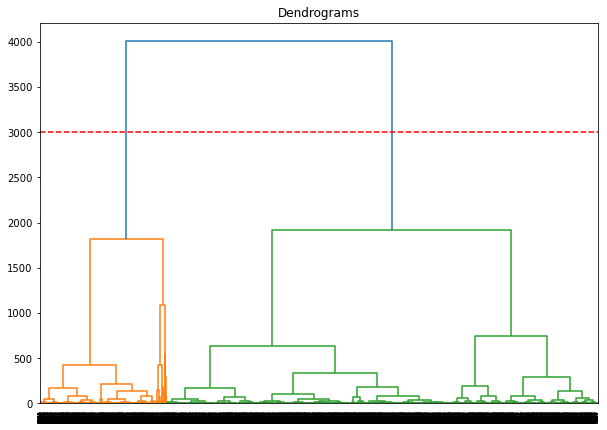

In [8]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(DF, method='ward'))
plt.axhline(y=3000, color='r', linestyle='--')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
ans = cluster.fit_predict(DF)


In [10]:
from sklearn import metrics
print(round(metrics.accuracy_score(x,ans),2)*100,"%")

85.0 %
